In [6]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams.update({
    'font.size': 14,
    'font.family': 'serif',
    'axes.linewidth': 1.0,
    'axes.labelsize': 16,
    'lines.linewidth': 2,
    'lines.markersize': 7,
    'xtick.major.size': 5,
    'ytick.major.size': 5,
    'figure.figsize': (6,4),
    'legend.frameon': False
})

In [47]:
def backtest_viz(question: str, polymarket_path: str, predictions_path: str):
    # data from polymarket UI
    real = pd.read_csv(polymarket_path)
    real['date'] = pd.to_datetime(real['Date (UTC)'])

    # data from backtests
    with open(predictions_path, 'rb') as f:
        res = pickle.load(f)

    predictions = pd.DataFrame({
        'date': [elem['date'] for elem in res],
        'prediction': [elem['probabilities']['positive'] for elem in res],
        'confidence': [elem['confidence'] for elem in res]
    })

    merged_df = pd.merge(real, predictions, on='date', how='inner')

    plt.figure(figsize=(12, 6))
    plt.plot(merged_df['date'], merged_df['Price'], label='Real Price', color='blue')
    plt.plot(merged_df['date'], merged_df['prediction'], label='Prediction', color='red')

    colors = {'low': 'red', 'medium': 'yellow', 'high': 'green'}
    for i in range(len(merged_df)):
        color = colors[merged_df['confidence'][i]]
        plt.scatter(merged_df['date'][i], merged_df['prediction'][i], color=color, s=100)

    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'{key.capitalize()} Confidence')
               for key, color in colors.items()]
    plt.legend(handles=handles + plt.gca().get_legend_handles_labels()[0], loc='upper right')

    plt.xlabel('Date')
    plt.ylabel('Price / Prediction')
    plt.title(question)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


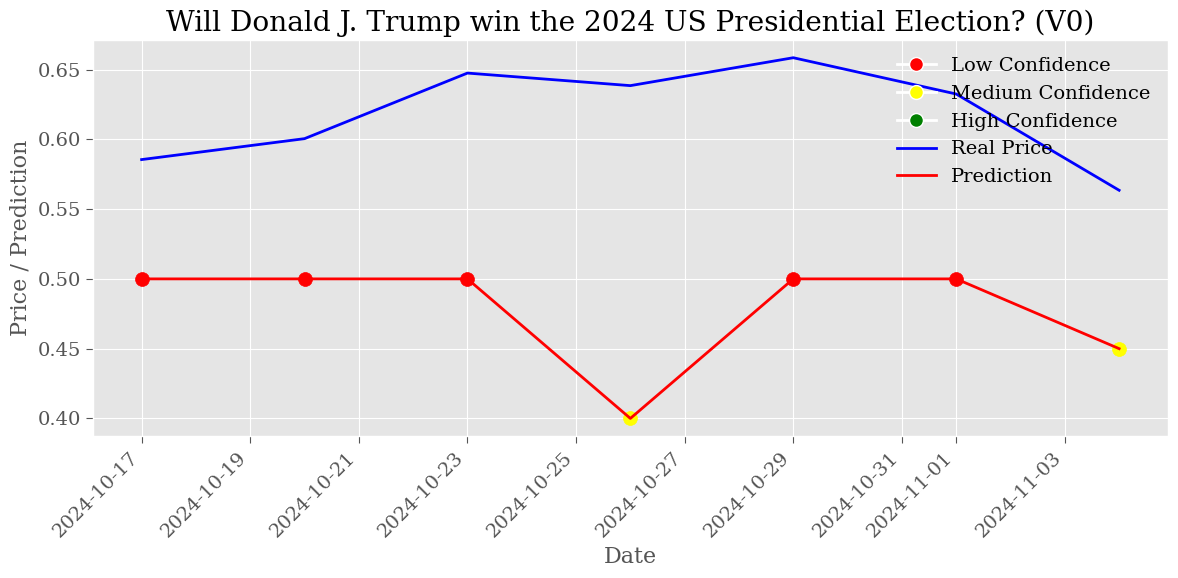

In [14]:
backtest_viz(
    question="Will Donald J. Trump win the 2024 US Presidential Election? (V0)",
    polymarket_path="/content/pol_data.csv",
    predictions_path="/content/trump_v0.pickle",
)

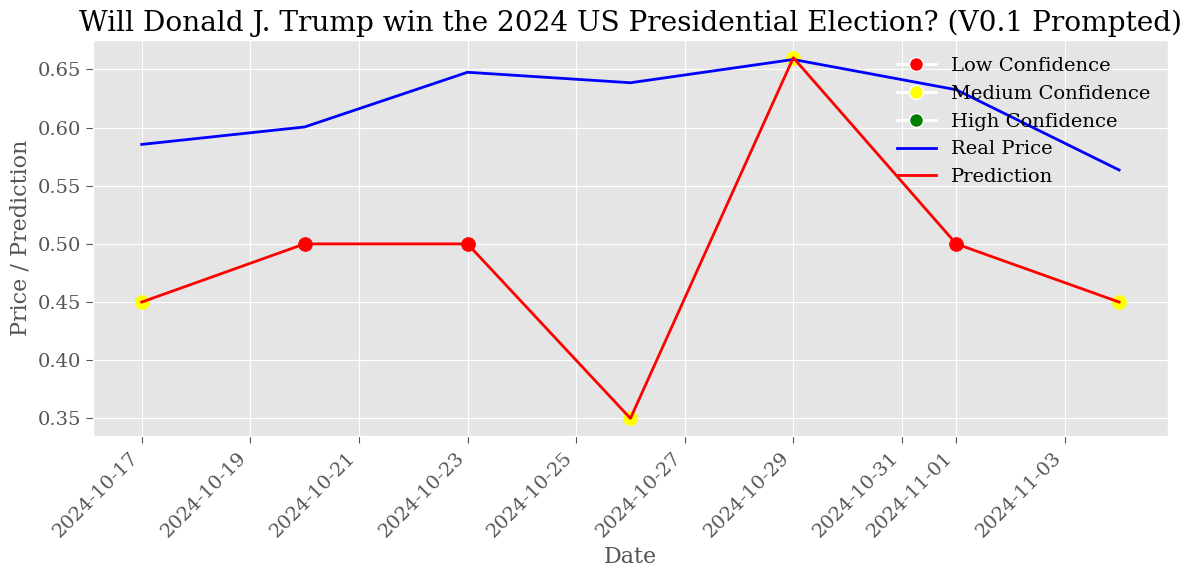

In [15]:
backtest_viz(
    question="Will Donald J. Trump win the 2024 US Presidential Election? (V0.1 Prompted)",
    polymarket_path="/content/pol_data.csv",
    predictions_path="/content/trump_v0.1.pickle",
)

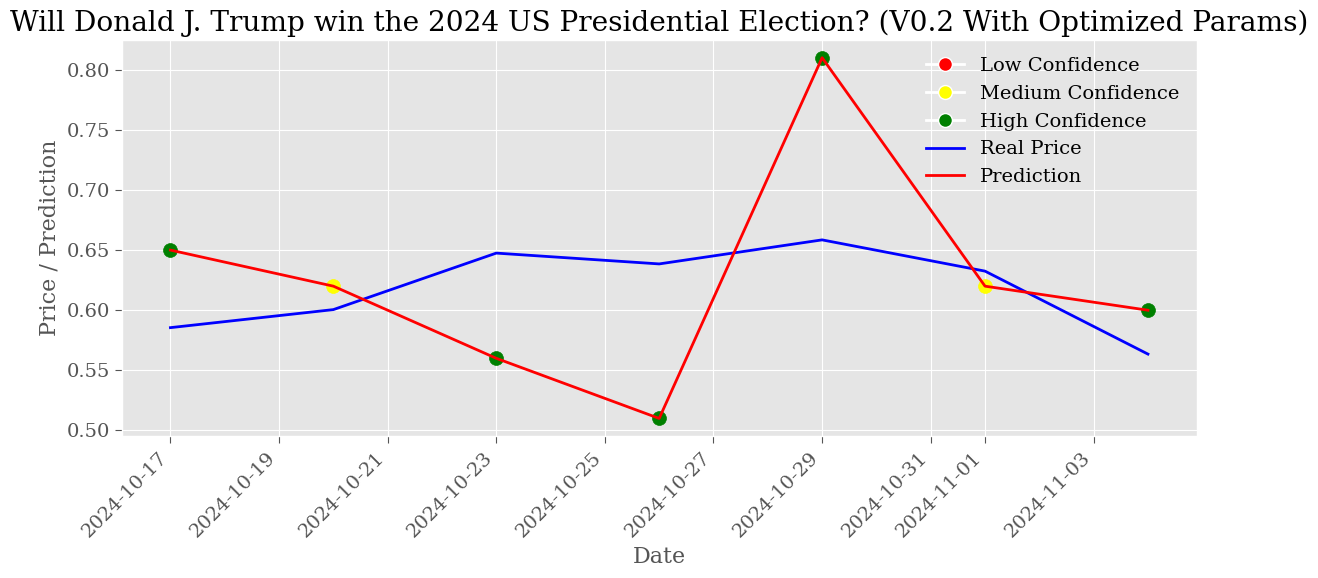

In [37]:
backtest_viz(
    question="Will Donald J. Trump win the 2024 US Presidential Election? (V0.2 With Optimized Params)",
    polymarket_path="/content/pol_data.csv",
    predictions_path="/content/trump_v0.2.pickle",
)

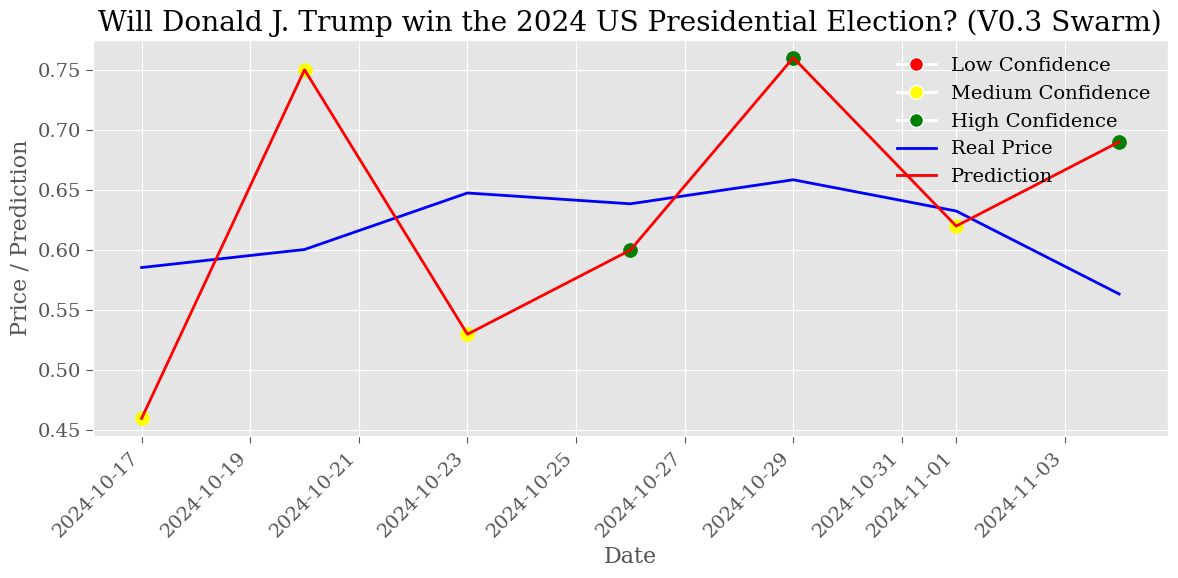

In [51]:
backtest_viz(
    question="Will Donald J. Trump win the 2024 US Presidential Election? (V0.3 Swarm)",
    polymarket_path="/content/pol_data.csv",
    predictions_path="/content/trump_v0.3.pickle",
)

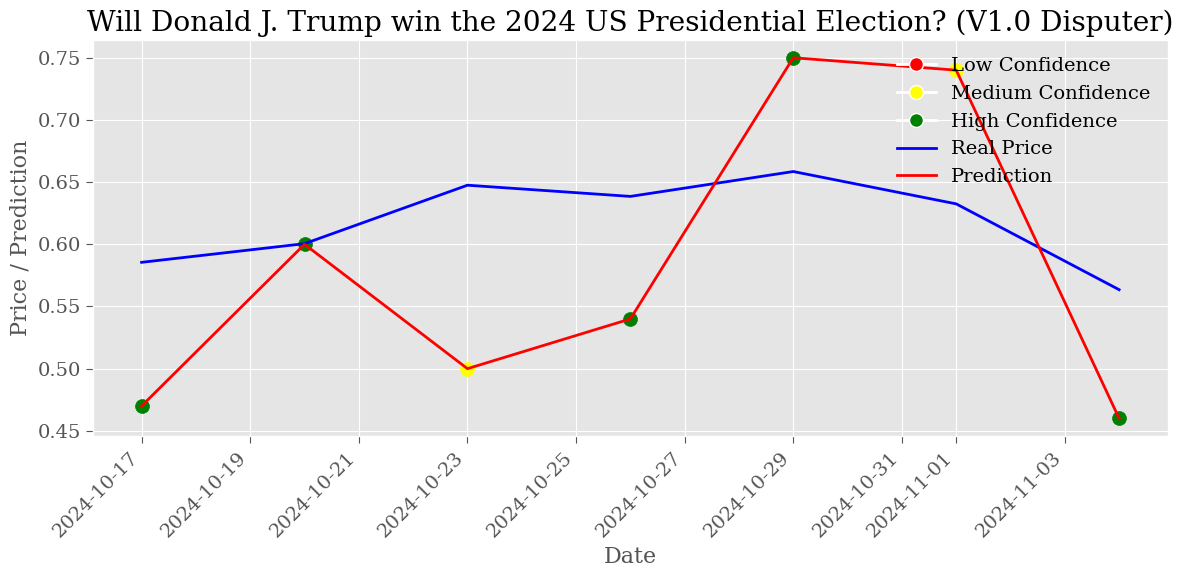

In [53]:
backtest_viz(
    question="Will Donald J. Trump win the 2024 US Presidential Election? (V1.0 Disputer)",
    polymarket_path="/content/pol_data.csv",
    predictions_path="/content/trump_v1.0.pickle",
)